# THE SPARKS FOUNDATION

### GRIP - DATA SCIENCE AND BUSINESS ANALYTICS INTERN - JULY 2021

#### Submitted by : Settypalli Sai Jyothi

#### Task -1 : Prediction using Supervised Machine Learning

### Problem Statement : Predict the percentage of a student based on no. of study hours using supervised machine learning

#### In supervised machine learning, a model is able to predict with the help of labeled dataset.Supervised ML is of two types :
1)Classification<br>2)Regression<br>Here, Regression is used as the problem is about relationship between two variables where a change in one variable is associated with a change in other variable. 

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Importing data from CSV file

In [2]:
df = pd.read_csv("Task - 1 dataset.csv")

In [3]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#### Understanding data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Type of attributes :<br>Hours - Continuous Variable<br>Scores - Discrete Variable

Also, there are no missing values.

#### Outliers

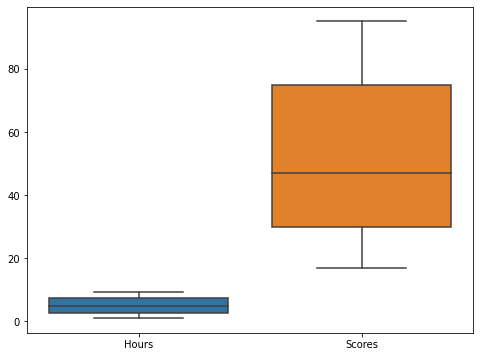

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

There are no outliers in both the columns.

#### Descriptive Statistics

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Scatter plot

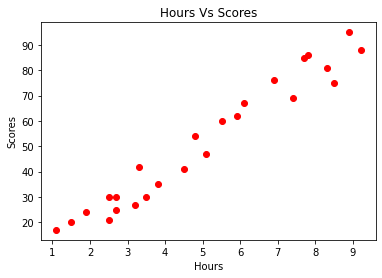

In [8]:
plt.scatter(df.Hours,df.Scores,color = "red")
plt.title("Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is a strong positive correlation between the two variables - "Hours" and "Scores".

#### Splitting data into training(80%) and testing(20%) sets

In [10]:
x = df[['Hours']]
y = df['Scores']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

#### Modelling

In [11]:
reg = LinearRegression()
reg.fit(x_train,y_train)
print("Training done!")

Training done!


In [12]:
reg.coef_

array([9.91065648])

In [13]:
reg.intercept_

2.018160041434683

In [14]:
print("Linear Regression equation is Scores = ",np.round(reg.coef_[0],2),"* Hours + ",np.round(reg.intercept_,2))

Linear Regression equation is Scores =  9.91 * Hours +  2.02


#### Plotting Regression Line

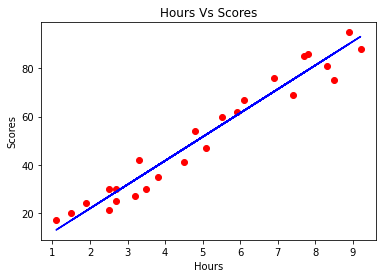

In [15]:
plt.scatter(x,y,color = "red")
plt.plot(x,reg.predict(x),color = 'blue')
plt.title("Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

#### Predicting scores of test data

In [16]:
y_pred = reg.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

#### Comparing Actual and Predicted scores of test data

In [17]:
df2 = pd.DataFrame({"Actual Score" : y_test,"Predited Score" : y_pred})
df2

,Actual Score,Predited Score
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


#### Evaluating the model

In [18]:
print('Mean absolute error = ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error = ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared error = ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score = ',metrics.r2_score(y_test,y_pred))

Mean absolute error =  4.183859899002975
Mean squared error =  21.5987693072174
Root Mean squared error =  4.6474476121003665
R2 Score =  0.9454906892105356


#### Predicting score if a student studies for 9.25 hrs/ day?

In [19]:
hours = 9.25
z = reg.predict([[hours]])
print("No. of hours = ",hours)
print("Predicted score = ",z[0])

No. of hours =  9.25
Predicted score =  93.69173248737538
